In [4]:
from tyssue.dynamics.base_gradients import length_grad
from tyssue import generation, Sheet, SheetGeometry, config

sheet = Sheet('etst', *generation.three_faces_sheet())
SheetGeometry.update_all(sheet)

lg = length_grad(sheet)

import numpy as np
assert np.all(lg.loc[0].values == np.array([-1, 0, 0]))



In [13]:
from tyssue.draw import sheet_view
draw_specs = config.draw.sheet_spec()
sheet.face_df["col"] = np.linspace(0.0, 1.0, num=sheet.face_df.shape[0])
draw_specs["face"]["color"] = sheet.face_df["col"]


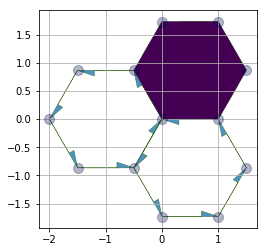

In [18]:
draw_specs['face'].update({"visible": True})
sheet.face_df['visible'] = False
sheet.face_df.loc[0, 'visible'] = True

fig, ax = sheet_view(sheet, mode='2D', **draw_specs)

In [19]:
polys = ax.collections[2]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

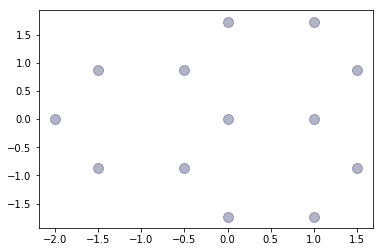

In [23]:
draw_specs["edge"]["color"] = np.random.random(sheet.Nv)
fig, ax = sheet_view(sheet, mode='2D', **draw_specs)


In [2]:
from pathlib import Path

In [25]:
from tyssue import stores,  io


In [26]:
stores.stores_list

['rod_sheet.hf5',
 '15_cells_patch.hf5',
 'before_apoptosis.hf5',
 '__pycache__',
 'planar_periodic8x8.hf5',
 '__init__.py',
 'sheet6x5.hf5',
 'small_hexagonal.hf5',
 'small_ellipsoid.hf5']

In [5]:
sheet = Sheet('test', io.hdf5.load_datasets(
    Path(stores.stores_dir)/'small_ellipsoid.hf5'))

In [37]:
np.linalg.norm(height_grad(sheet), axis=1).mean()

1.9690180360024239

In [44]:
np.sin(np.pi/10)

0.3090169943749474

In [47]:
sheet = Sheet('test', *generation.three_faces_sheet())

In [ ]:
sheet.vert_df.to_csv()

In [45]:
from tyssue.dynamics.sheet_gradients import height_grad

sheet = generation.ellipsoid_sheet(1, 1, 1, 10)
sheet.settings['geometry'] = 'spherical'
np.testing.assert_approx_equal(
    np.linalg.norm(height_grad(sheet), axis=1).mean(), 2, 2)

In [38]:
np.linalg.norm(height_grad(sheet), axis=1).mean()

1.9690180360024239

In [36]:
from tyssue.draw import sheet_view
import ipyvolume as ipv

In [29]:
ipv.clear()
fig, mesh = sheet_view(sheet, mode='3D')
fig

Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…